In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import warnings
import time
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats
# ignore python warnings
warnings.filterwarnings("ignore")

In [2]:
seed = 101

In [3]:
featureNames = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", 
"word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
"word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses",
"word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
"word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
"word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
"word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
"word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
"word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
"word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
"char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average",
"capital_run_length_longest", "capital_run_length_total", "class"]
df = pd.read_csv(r'dataset/spambase.csv', header=None, names=featureNames)

In [4]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


Text(0.5, 1.0, 'Class Frequency\n0: Ham\n1: Spam')

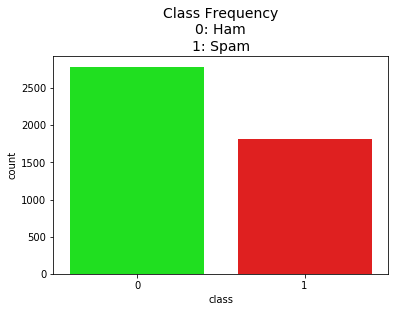

In [5]:
colors = ["#00FF00", "#FF0000"]
sns.countplot('class', data=df, palette=colors)
plt.title('Class Frequency\n0: Ham\n1: Spam', fontsize=14)

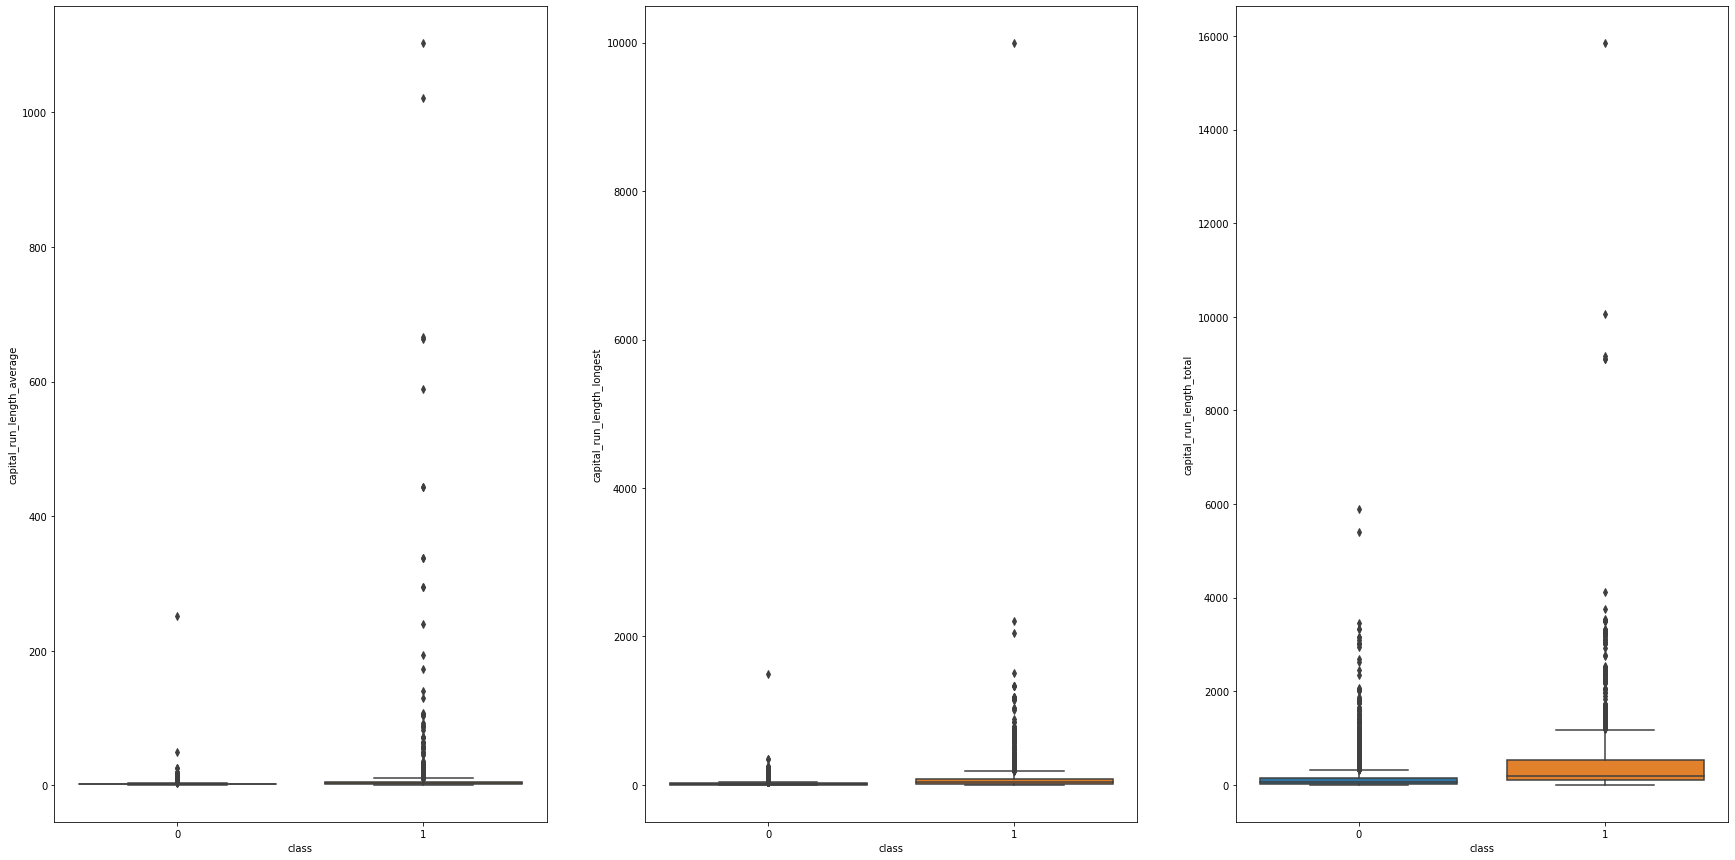

In [6]:
f, axes = plt.subplots(1, 3, figsize=(30,15))
sns.boxplot(x="class", y="capital_run_length_average", data=df, ax=axes[0])
sns.boxplot(x="class", y="capital_run_length_longest", data=df, ax=axes[1])
sns.boxplot(x="class", y="capital_run_length_total", data=df, ax=axes[2])
plt.show()

## Outlier Removal

In [7]:
def removeOutlier(df, col_name, threshold, upper=True):    
    if(upper==True):
        df = df.drop(df[(df[col_name] > threshold)].index)
    else:
        df = df.drop(df[(df[col_name] < threshold)].index)
    return df
    
df = removeOutlier(df, 'capital_run_length_average', 200)
df = removeOutlier(df, 'capital_run_length_longest', 1400)
df = removeOutlier(df, 'capital_run_length_total', 4000)

In [8]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    
    One possible improvement could be to use all columns fot fitting
    and using the first 2 columns and median of all other columns
    for predicting.
    
    Adopted from:
    http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """
    reduced_data = X[:, :2]
    model = model_class(**model_params)
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    return plt

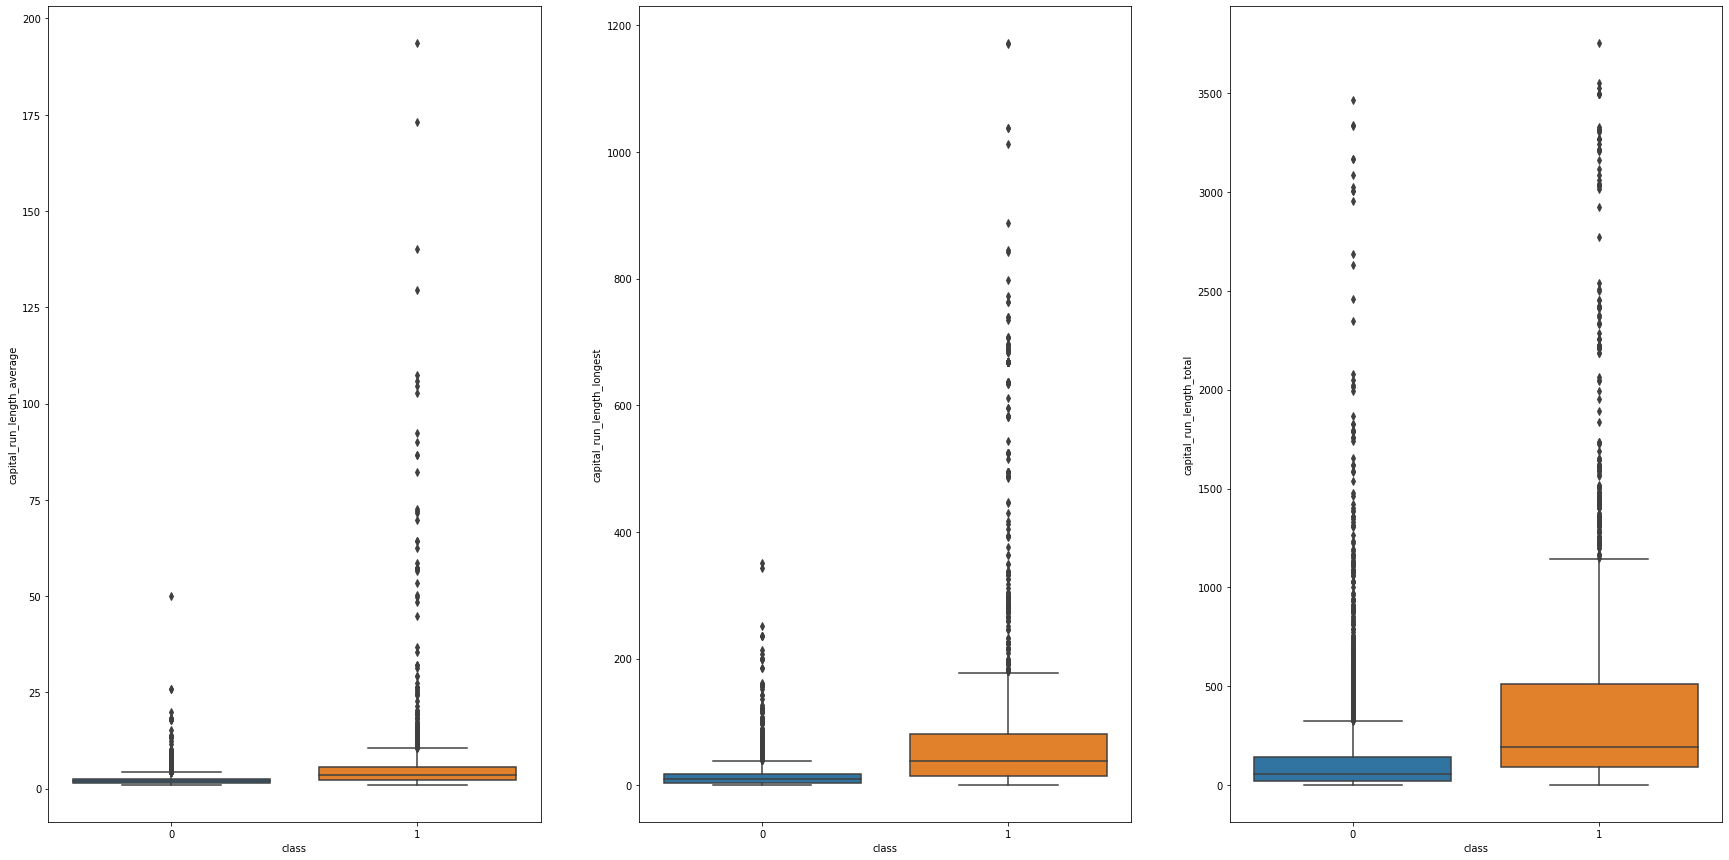

In [9]:
f, axes = plt.subplots(1, 3, figsize=(30,15))
sns.boxplot(x="class", y="capital_run_length_average", data=df, ax=axes[0])
sns.boxplot(x="class", y="capital_run_length_longest", data=df, ax=axes[1])
sns.boxplot(x="class", y="capital_run_length_total", data=df, ax=axes[2])

## Normalization
on `capital_run_length_average`, `capital_run_length_longest`, and `capital_run_length_total`
rescale said columns to (0,100) so that they scale to other columns

In [10]:
mscaler = MinMaxScaler((0,100))

df['capital_run_length_average'] = mscaler.fit_transform(np.array(df['capital_run_length_average']).reshape(-1,1))
df['capital_run_length_longest'] = mscaler.fit_transform(np.array(df['capital_run_length_longest']).reshape(-1,1))
df['capital_run_length_total'] = mscaler.fit_transform(np.array(df['capital_run_length_total']).reshape(-1,1))

In [11]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,...,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000
mean,0.104044,0.213707,0.277900,0.065675,0.311205,0.096162,0.114585,0.105603,0.089035,0.238330,...,0.038251,0.137354,0.017011,0.267778,0.075112,0.043963,1.417412,3.827007,7.043775,0.391921
std,0.305758,1.293433,0.500914,1.398339,0.673004,0.274375,0.392245,0.401910,0.278193,0.645218,...,0.243061,0.230609,0.109627,0.816689,0.244524,0.429346,4.060266,8.832909,12.595832,0.488233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.302857,0.427350,0.906425,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,0.656364,1.196581,2.479339,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.311250,0.050000,0.000000,1.401039,3.589744,6.958144,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,100.000000,100.000000,100.000000,1.000000


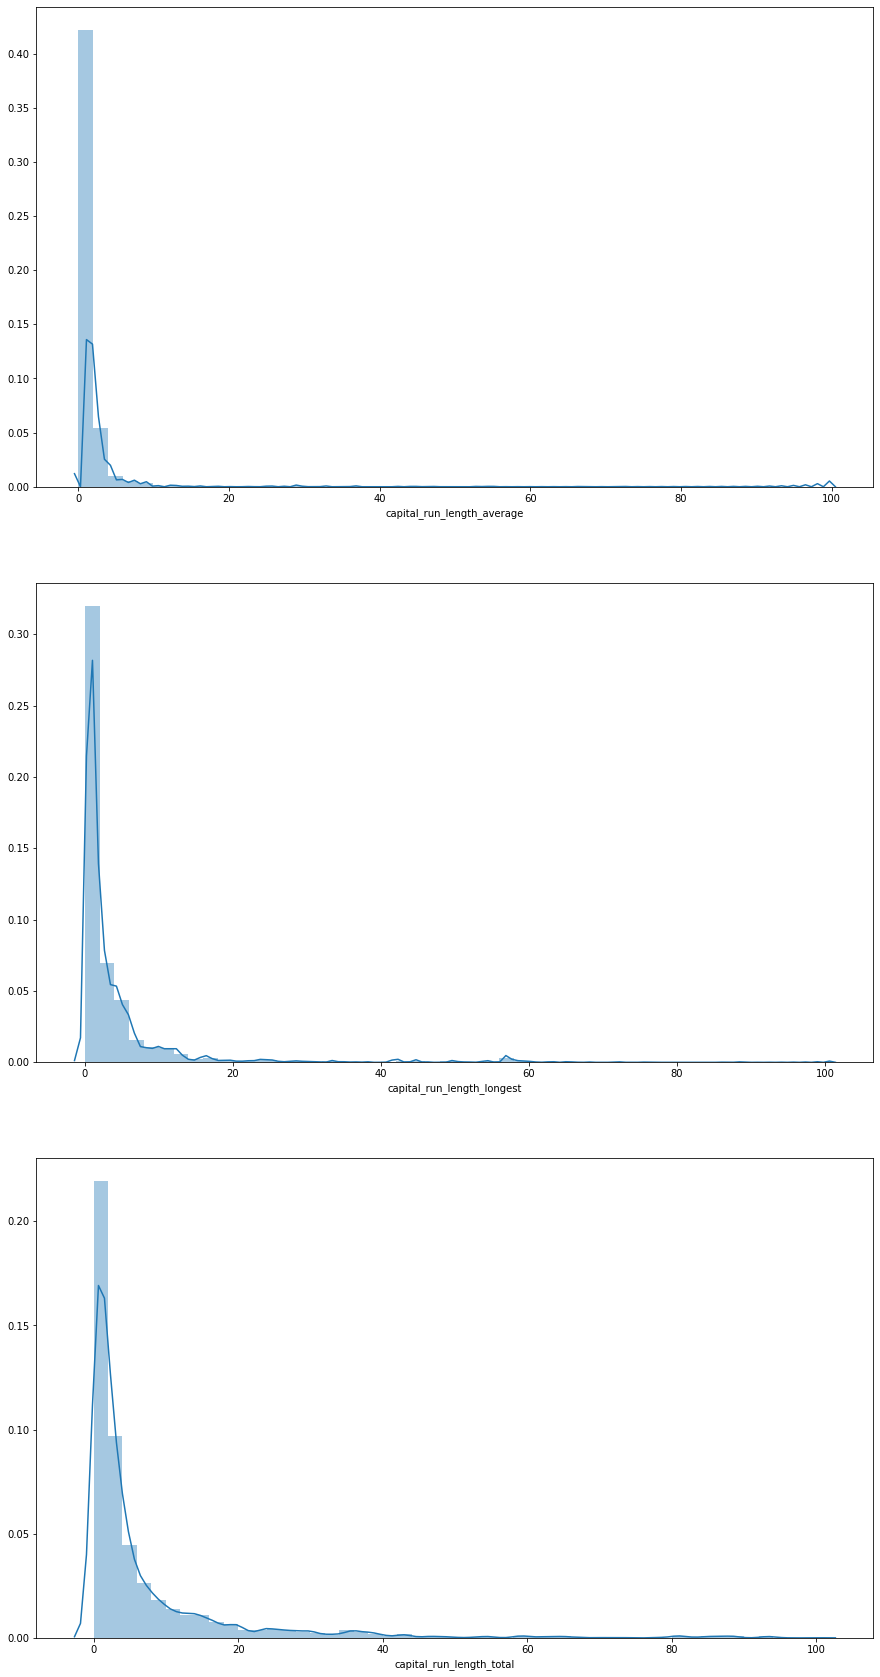

In [12]:
f, axes = plt.subplots(3, 1, figsize=(15,30))
sns.distplot(df['capital_run_length_average'], ax=axes[0])
sns.distplot(df['capital_run_length_longest'], ax=axes[1])
sns.distplot(df['capital_run_length_total'], ax=axes[2])

### Log transform said columns, twice

In [13]:
df['capital_run_length_average'] = np.log(np.array(df['capital_run_length_average']+1).reshape(-1,1))
df['capital_run_length_longest'] = np.log(np.array(df['capital_run_length_longest']+1).reshape(-1,1))
df['capital_run_length_total'] = np.log(np.array(df['capital_run_length_total']+1).reshape(-1,1))

df['capital_run_length_average'] = np.log(np.array(df['capital_run_length_average']+1).reshape(-1,1))
df['capital_run_length_longest'] = np.log(np.array(df['capital_run_length_longest']+1).reshape(-1,1))
df['capital_run_length_total'] = np.log(np.array(df['capital_run_length_total']+1).reshape(-1,1))


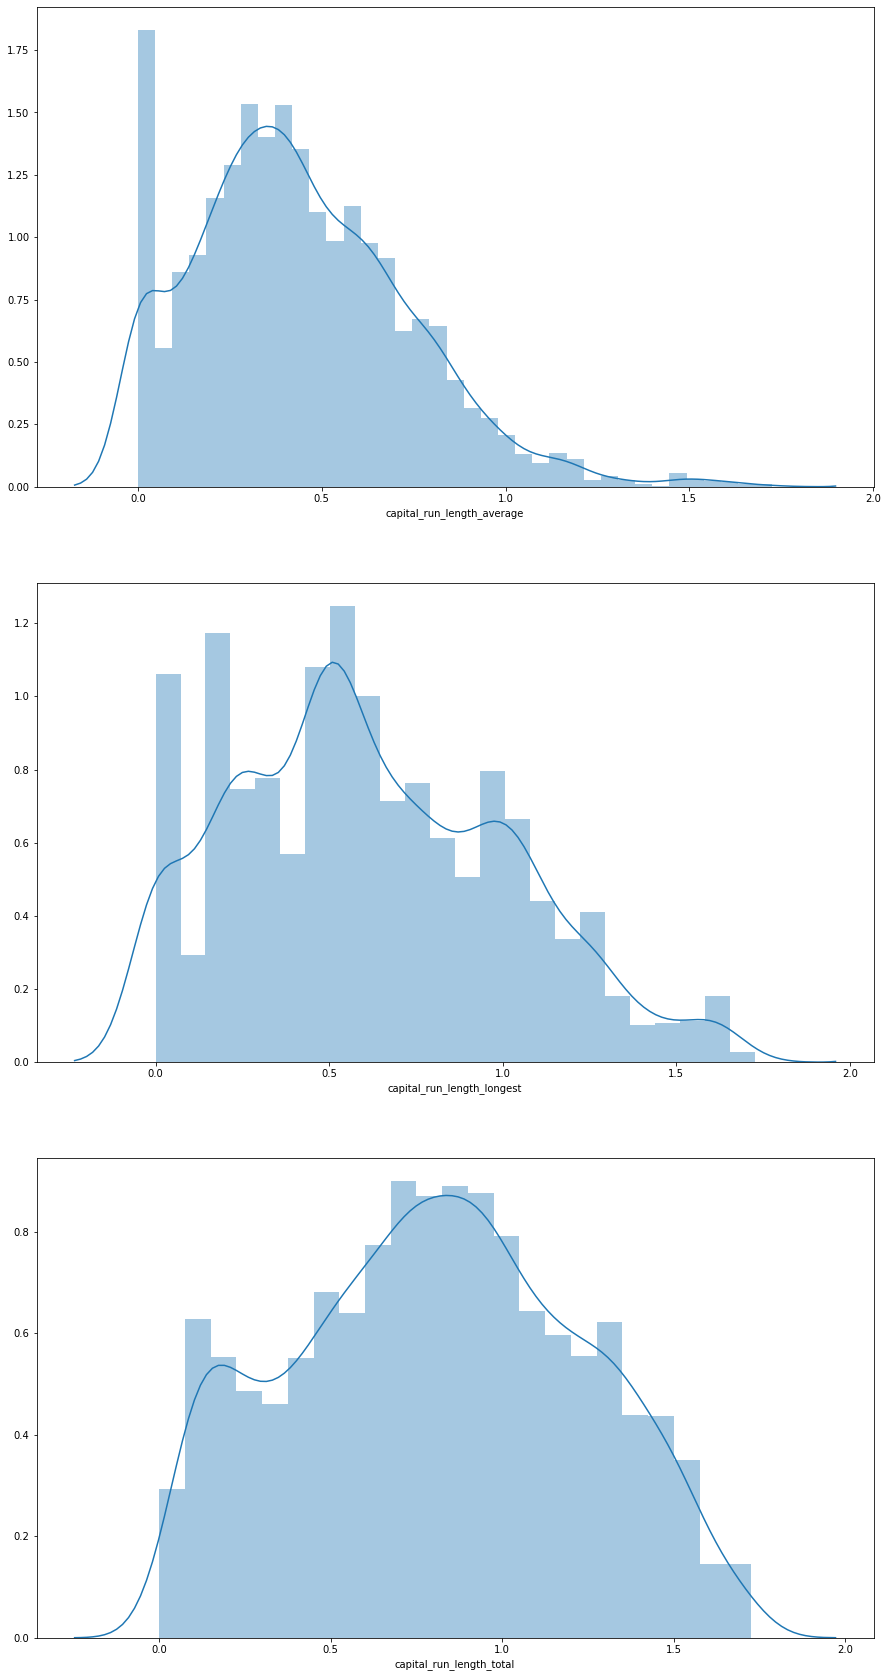

In [14]:
# Normal
f, axes = plt.subplots(3, 1, figsize=(15,30))
sns.distplot(df['capital_run_length_average'], ax=axes[0])
sns.distplot(df['capital_run_length_longest'], ax=axes[1])
sns.distplot(df['capital_run_length_total'], ax=axes[2])

In [15]:
df = df.reset_index()
X = df
X = X.drop(columns='index')
y = X.pop('class')


## PCA representation
but how many components do we choose?

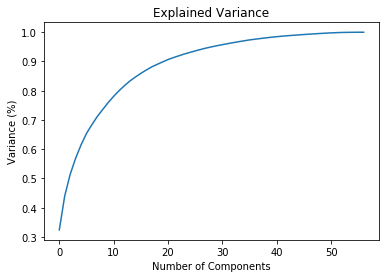

In [16]:
pca = PCA().fit(X)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

## PCA TUNING

with logistic regression

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=seed)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)


In [18]:
acc_score_ = []
train_acc_score_ = []
time_score_ = []
components = range(1,58)
acc_max_ = []
acc_min_ = []
train_acc_max_ = []
train_acc_min_ = []
time_max_ = []
time_min_ = []
for com in components:
    pca = PCA(com)
    acc_score = []
    train_acc_score = []
    time_score = []

    train_acc_max = 0
    train_acc_min = 100
    acc_max = 0
    acc_min = 100
    time_max = 0
    time_min = 100
    for train_index, test_index in skf.split(X, y):
        logreg = LogisticRegression()
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        pca.fit(X_train)
        new_X_train = pca.transform(X_train)
        new_X_test = pca.transform(X_test)

        time1 = time.time()
        logreg.fit(new_X_train, y_train)
        time2 = time.time()

        trainScore = logreg.score(new_X_train, y_train)
        testScore = logreg.score(new_X_test, y_test)
        time_lapsed = time2 - time1

        train_acc_score.append(trainScore)
        acc_score.append(testScore)
        time_score.append(time_lapsed)

        if(trainScore > train_acc_max):
            train_acc_max = trainScore
        if(trainScore < train_acc_min):
            train_acc_min = trainScore
        if(testScore > acc_max):
            acc_max = testScore
        if(testScore < acc_min):
            acc_min = testScore
        if(time_lapsed > time_max):
            time_max = time_lapsed
        if(time_lapsed < time_min):
            time_min = time_lapsed
    acc_score_.append(np.mean(acc_score))
    acc_max_.append(acc_max)
    acc_min_.append(acc_min)

    train_acc_score_.append(np.mean(train_acc_score))
    train_acc_max_.append(train_acc_max)
    train_acc_min_.append(train_acc_min)

    time_score_.append(np.mean(time_score))
    time_max_.append(time_max)
    time_min_.append(time_min)


time1 = time.time()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
time2 = time.time()

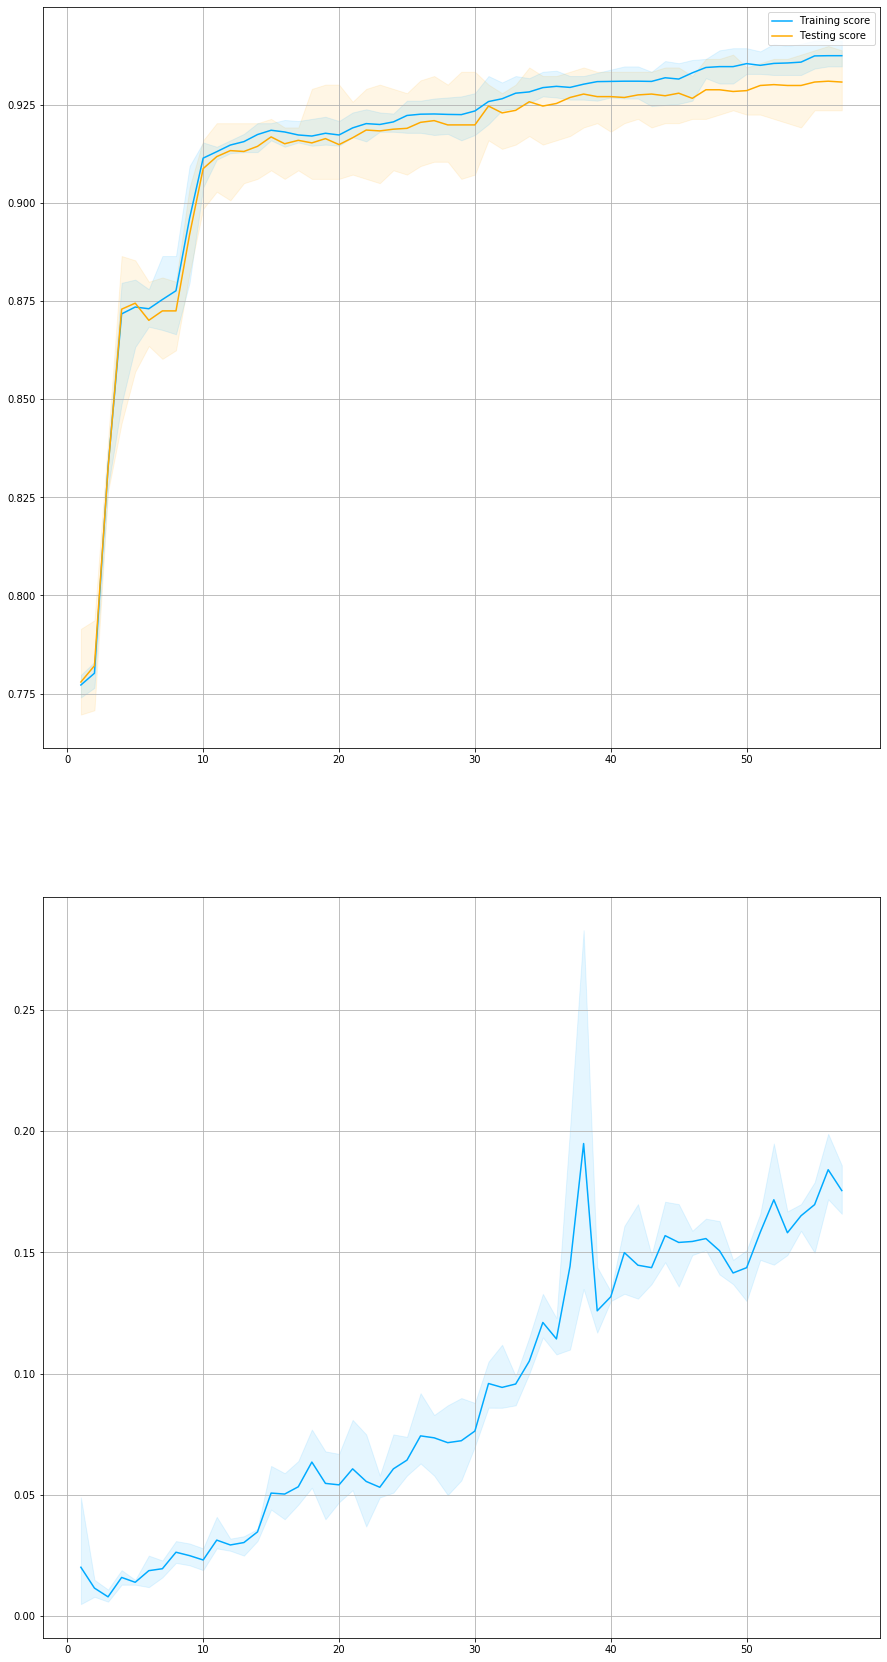

In [19]:
f, ax = plt.subplots(2,1, figsize=(15,30))

ax[0].fill_between(components, list(np.array(acc_max_)), list(np.array(acc_min_)) , alpha=0.1, color="#ffaa00")
ax[0].fill_between(components, list(np.array(train_acc_max_)), list(np.array(train_acc_min_)) , alpha=0.1, color="#00aaff")

ax[0].plot(components, train_acc_score_, color="#00aaff", label="Training score")
ax[0].plot(components, acc_score_, color="#ffaa00", label="Testing score")

ax[0].legend()
ax[0].grid(True)

ax[1].fill_between(components, list(np.array(time_max_)), list(np.array(time_min_)) , alpha=0.1, color="#00aaff")

ax[1].plot(components, time_score_, color="#00aaff")
ax[1].grid(True)

### PCA Conclusion
`n_components = 20`

## Model tuning
using `GridSearchCV` to select the best parameter

In [20]:
# Classifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

# Parameter decider
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [21]:
lr_par = {'C': [0.01, 0.1, 0.5, 0.75, 1, 10, 100]}
svm_par = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
mlp_par = {'activation': ['logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'hidden_layer_sizes': [(32,), (16,), (16,16), (8,8)]}
dt_par = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': list(range(2,5,1)), 'min_samples_leaf': list(range(5,8,1))}
#nb_par = {'alpha': [0, 0.25, 0.5, 0.75, 1], 'fit_prior': [True, False]}
knn_par = {'n_neighbors': list(range(3,7,2)), 'weights':['uniform','distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [22]:
clf = []
clf_name = ['lr', 'svm', 'mlp', 'dt', 'knn']
clf.append(GridSearchCV(LogisticRegression(random_state=seed), lr_par).fit(X, y).best_estimator_)
clf.append(GridSearchCV(SVC(random_state=seed), svm_par).fit(X, y).best_estimator_)
clf.append(GridSearchCV(MLPClassifier(random_state=seed), mlp_par).fit(X, y).best_estimator_)
clf.append(GridSearchCV(DecisionTreeClassifier(random_state=seed), dt_par).fit(X, y).best_estimator_)
#clf.append(GridSearchCV(ComplementNB(), nb_par).fit(X, y).best_estimator_)
clf.append(GridSearchCV(KNeighborsClassifier(), knn_par).fit(X, y).best_estimator_)


In [66]:
res = []
res_name = ['smote', 'bsmote', 'adasyn', 'ros', 'rus', 'tl', 'noRes']
res.append(SMOTE(random_state=seed))
res.append(BorderlineSMOTE(random_state=seed))
res.append(ADASYN(random_state=seed))
res.append(RandomOverSampler(random_state=seed))
res.append(RandomUnderSampler(random_state=seed))
res.append(TomekLinks(sampling_strategy='majority', random_state=seed))
res.append(None)

In [24]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def GetMetrics(estimator, X, y):
    y_pred = estimator.predict(X)
    acc = accuracy_score(y, y_pred)
    pre, rec, fs, sup = precision_recall_fscore_support(y, y_pred)
    return acc, pre, rec, fs

In [25]:
pca = PCA(10)
# 5 cv, 6+1 resampling, 5 classifier
scores = [None] * 5
for i in range(len(scores)):
    scores[i] = [None] * len(res)
    for j in range(len(scores[i])):
        scores[i][j] = [None] * len(clf)
        
cross = 0
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    
    for i in range(len(res)):
        if i == len(res) - 1:
            X_res, y_res = X_train, y_train
        else:
            X_res, y_res = res[i].fit_resample(X_train, y_train)
        for j in range(len(clf)):
            classifier = clf[j].fit(X_res, y_res)
            scores[cross][i][j] = GetMetrics(classifier, X_test, y_test)
    cross = cross + 1


In [26]:
def autolabel(rects, axes):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(), 3)
        axes.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [27]:
clf_accs = []
clf_recs = []
clf_recs_major = []
for index in range(len(clf)):
    acc = []
    rec = []
    rec_major = []
    for cross in range(5):
        for i in range(len(res)):
            acc.append(scores[cross][i][index][0])
            rec.append(scores[cross][i][index][2][1])
            rec_major.append(scores[cross][i][index][2][0])
    clf_accs.append(np.mean(acc))
    clf_recs.append(np.mean(rec))
    clf_recs_major.append(np.mean(rec_major))


In [28]:
res_accs = []
res_recs = []
res_recs_major = []
for index in range(len(res)):
    acc = []
    rec = []
    rec_major = []
    for cross in range(5):
        for i in range(len(clf)):
            acc.append(scores[cross][index][i][0])
            rec.append(scores[cross][index][i][2][1])
            rec_major.append(scores[cross][index][i][2][0])
    res_accs.append(np.mean(acc))
    res_recs.append(np.mean(rec))
    res_recs_major.append(np.mean(rec_major))


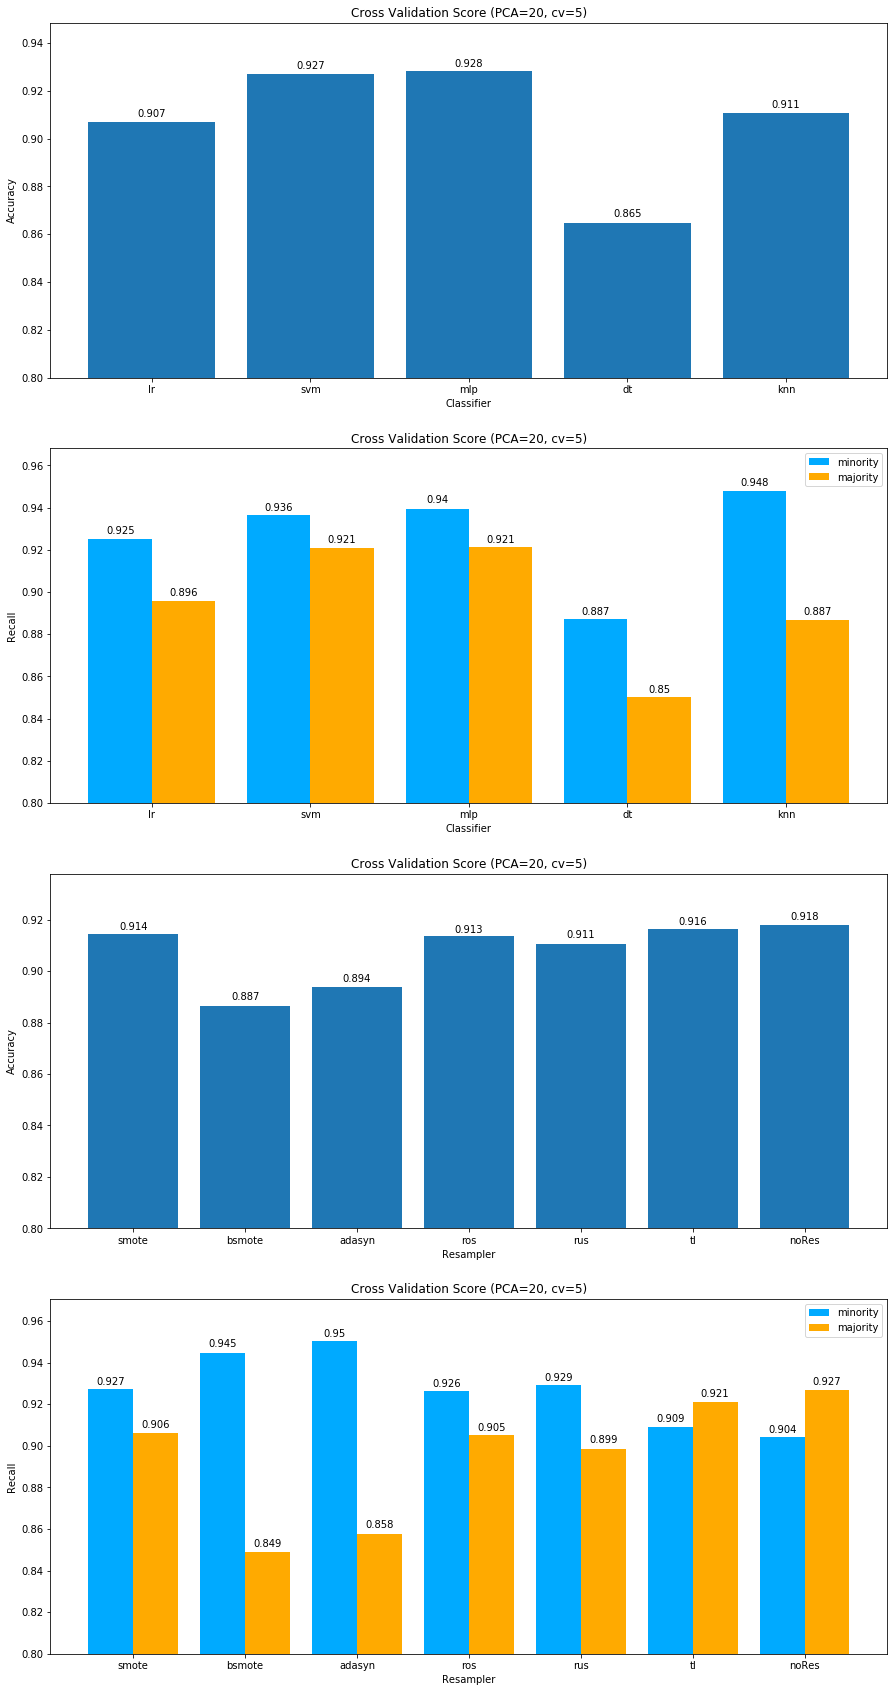

In [29]:
width = 0.40 

x = np.arange(len(clf_name))

fig, ax = plt.subplots(4,1, figsize=(15,30))

# first plot
rect = ax[0].bar(clf_name, clf_accs)
ax[0].axes.set_ylim(0.8, np.min(np.max(clf_accs)+0.02), 1.0)
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Classifier')
ax[0].set_title('Cross Validation Score (PCA=20, cv=5)')
autolabel(rect, ax[0])

# second plot
rect = ax[1].bar(x-width/2, clf_recs, width=width, label='minority', color='#00aaff')
rect2 = ax[1].bar(x+width/2, clf_recs_major, width=width, label='majority', color='#ffaa00')
ax[1].axes.set_ylim(0.8, np.min(np.max(clf_recs)+0.02), 1.0)
ax[1].set_title('Cross Validation Score (PCA=20, cv=5)')
ax[1].set_ylabel('Recall')
ax[1].set_xlabel('Classifier')
ax[1].set_xticks(x)
ax[1].set_xticklabels(clf_name)
ax[1].legend()
autolabel(rect, ax[1])
autolabel(rect2, ax[1])

x = np.arange(len(res_name))

# third plot
rect = ax[2].bar(res_name, res_accs)
ax[2].axes.set_ylim(0.8, np.min(np.max(res_accs)+0.02), 1.0)
ax[2].set_ylabel('Accuracy')
ax[2].set_xlabel('Resampler')
ax[2].set_title('Cross Validation Score (PCA=20, cv=5)')
autolabel(rect, ax[2])

# fourth plot
rect = ax[3].bar(x-width/2, res_recs, width=width, label='minority', color='#00aaff')
rect2 = ax[3].bar(x+width/2, res_recs_major, width=width, label='majority', color='#ffaa00')
ax[3].axes.set_ylim(0.8, np.min(np.max(res_recs)+0.02), 1.0)
ax[3].set_title('Cross Validation Score (PCA=20, cv=5)')
ax[3].set_ylabel('Recall')
ax[3].set_xlabel('Resampler')
ax[3].set_xticks(x)
ax[3].set_xticklabels(res_name)
ax[3].legend()
autolabel(rect, ax[3])
autolabel(rect2, ax[3])

In [30]:
index = tuple()
best_score = 0
metric_index = 2 # 0 for accuracy, 1 for precision, 2 for recall, 3 for f1-score
for i in range(len(res)):
    for j in range(len(clf)):
        score = []
        for cross in range(5):
            if metric_index == 0:
                score.append(scores[cross][i][j][0])
            else:
                score.append(scores[cross][i][j][metric_index][1])
        if np.mean(score) > best_score:
            index = (i, j)
            res_index = i
            clf_index = j
            best_score = np.mean(score)

In [31]:
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
majority_scores = []
minority_scores = []

for i in range(len(metrics)):
    majority_cv_score = []
    minority_cv_score = []
    for j in range(5):
        if i == 0:
            majority_cv_score.append(scores[j][res_index][clf_index][0])
            minority_cv_score.append(scores[j][res_index][clf_index][0])
        else:
            majority_cv_score.append(scores[j][res_index][clf_index][i][0])
            minority_cv_score.append(scores[j][res_index][clf_index][i][1])
    majority_scores.append(np.mean(majority_cv_score))
    minority_scores.append(np.mean(minority_cv_score))
    
    

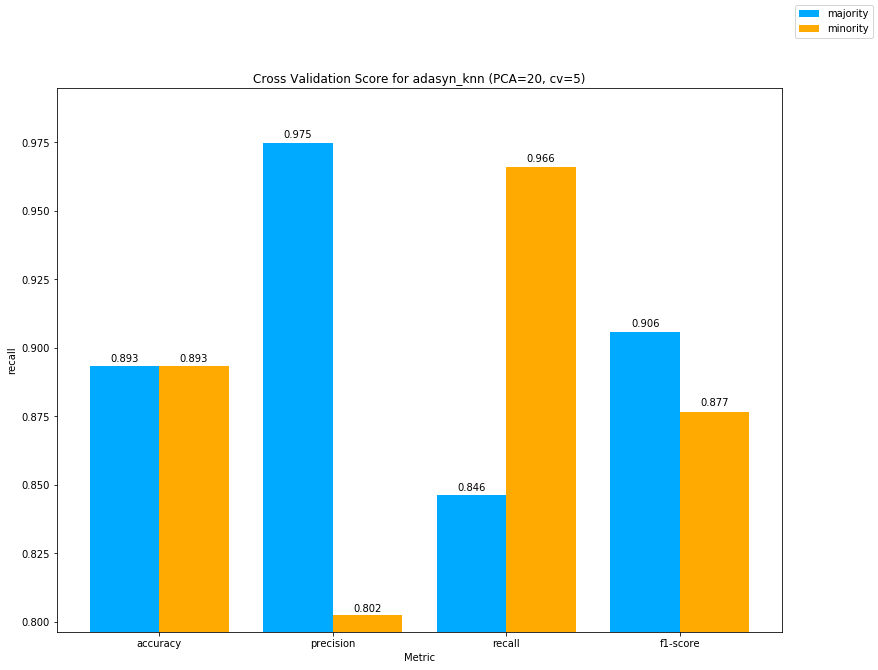

In [32]:
width = 0.40 

x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(13,10))


rect = ax.bar(x - width/2, majority_scores, width=width, label='majority', color='#00aaff')
rect2 = ax.bar(x + width/2, minority_scores, width=width, label='minority', color='#ffaa00')
ax.axes.set_ylim(np.min(majority_scores)-0.05, np.min(np.max(majority_scores)+0.02), 1.0)
ax.set_ylabel(metrics[metric_index])
ax.set_xlabel('Metric')
ax.set_title('Cross Validation Score for {}_{} (PCA=20, cv=5)'.format(res_name[res_index], clf_name[clf_index]))
ax.set_xticks(x)
ax.set_xticklabels(metrics)
autolabel(rect, ax)
autolabel(rect2, ax)
fig.legend()

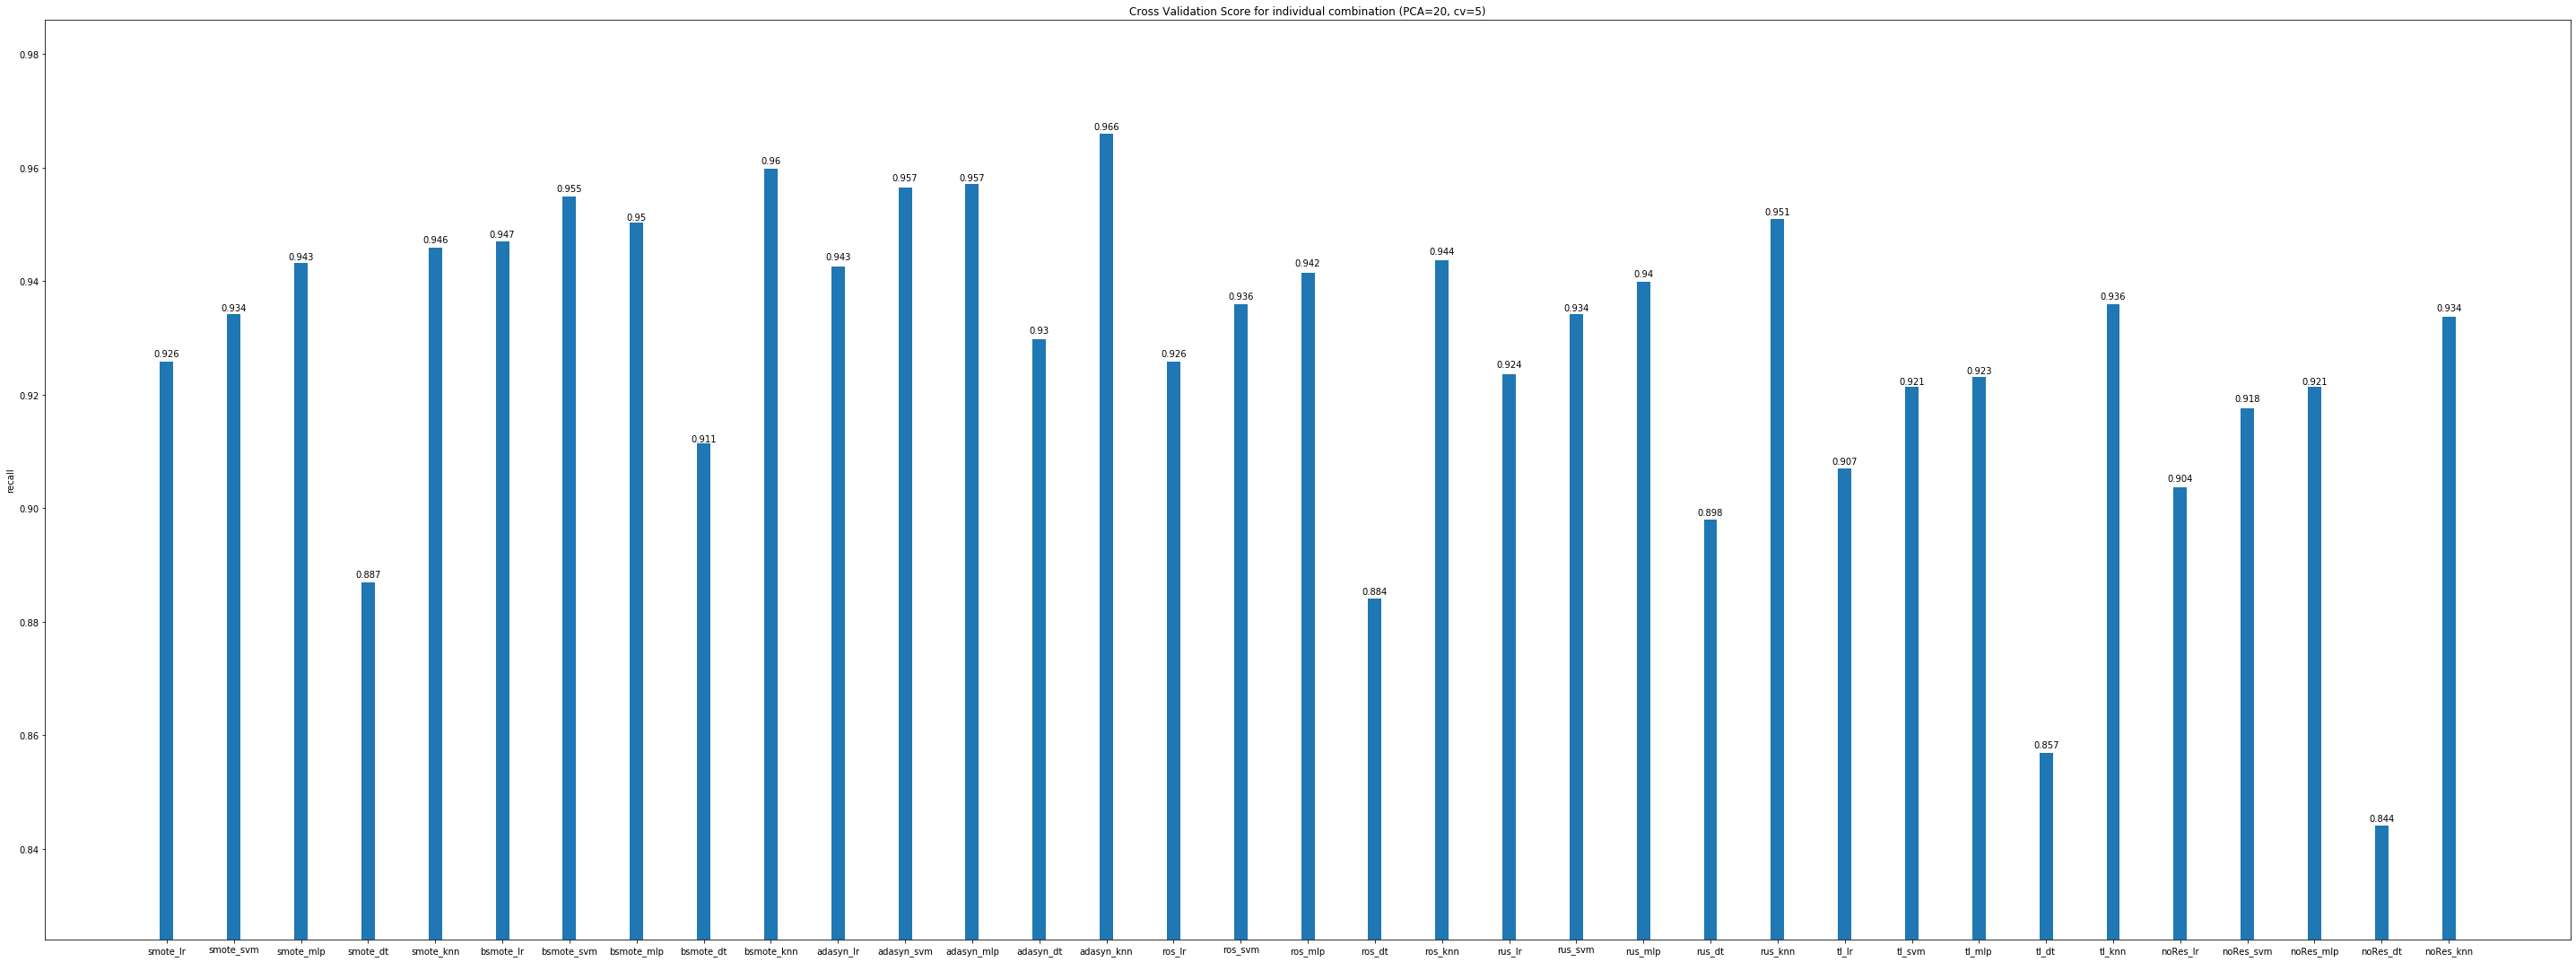

In [33]:
names = []
combinations = []
for i in range(len(res)):
    for j in range(len(clf)):
        names.append(res_name[i]+"_"+clf_name[j])
        score = []
        for cross in range(5):
            if metric_index == 0:
                score.append(scores[cross][i][j][metric_index])
            else:
                score.append(scores[cross][i][j][metric_index][1])
        combinations.append(np.mean(score))
fig, ax = plt.subplots(figsize=(40,15))
x = np.arange(len(names))
width = 0.2 

labels = names
rect = ax.bar(x, combinations, width)
ax.set_ylabel(metrics[metric_index])
ax.set_title('Cross Validation Score for individual combination (PCA=20, cv=5)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.axes.set_ylim(np.min(combinations)-0.02, np.min(np.max(combinations)+0.02), 1.0)
fig.tight_layout()
autolabel(rect, ax)


In [37]:
print(scores[0][0][0] + scores[1][0][0])

(0.9050218340611353, array([0.95542636, 0.84      ]), array([0.88509874, 0.93593315]), array([0.91891892, 0.88537549]), 0.9039301310043668, array([0.94161959, 0.85194805]), array([0.89766607, 0.91364903]), array([0.91911765, 0.88172043]))


In [67]:
new_score = [None] * len(res)
for i in range(len(new_score)):
    new_score[i] = [None] * len(clf)
    for j in range(len(new_score[i])):
        new_score[i][j] = [None] * 7
        for k in range(len(new_score[i][j])):
            new_score[i][j][k] = 0
# acc, pre major, pre minor, rec major, rec minor, f1 major, f1 minor

for i in range(len(res)):
    for j in range(len(clf)):
        for cross in range(5):
            new_score[i][j][0] += scores[cross][i][j][0]
            new_score[i][j][1] += scores[cross][i][j][1][0]
            new_score[i][j][2] += scores[cross][i][j][1][1]
            new_score[i][j][3] += scores[cross][i][j][2][0]
            new_score[i][j][4] += scores[cross][i][j][2][1]
            new_score[i][j][5] += scores[cross][i][j][3][0]
            new_score[i][j][6] += scores[cross][i][j][3][1]
        for k in range(7):
            new_score[i][j][k] /= 5


In [75]:
dataset_name = 'spambase'

dataset = [dataset_name] * 35
res_label = []
clf_label = []
m1 = []
m2 = []
m3 = []
m4 = []
m5 = []
m6 = []
m7 = []
for i in range(len(res)):
    for j in range(len(clf)):
        m1.append(new_score[i][j][0])
        m2.append(new_score[i][j][1])
        m3.append(new_score[i][j][2])
        m4.append(new_score[i][j][3])
        m5.append(new_score[i][j][4])
        m6.append(new_score[i][j][5])
        m7.append(new_score[i][j][6])
for i in range(35):
    res_label.append(labels[i].split('_')[0])
    clf_label.append(labels[i].split('_')[1])

d = {'dataset' : dataset, 'res': res_label, 'clf': clf_label, 'accuracy' : m1, 'precision-0': m2, 'precision-1': m3, 'recall-0': m4, 'recall-1': m5, 'f1-0': m6, 'f1-1': m7}
k = pd.DataFrame(d)
k.to_csv('{}_result.csv'.format(dataset_name), index=False)